# CS 345 fall 2022 final exam 

**Instructions:** 

* You have three hours
* Sign and date the honor statement below
* Submit your notebook via Canvas by the end of the exam


### Academic integrity statement

*I affirm that I have not given or received any unauthorized help on this exam, and that this work is my own.*


*write your name and today's date here*

Qianya Zhu 12/15/2022

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Short questions

1. What are hyperparameters and why is it important to find good values for them?  How is optimizing hyperparameters different than optimizing the value of classifier parameters such as the weight vector of a linear classifier?


*answer here*

When we distinguish from standard model parameters using hyperparameters. Finding good values that test better, training various models, and setting various values are important. Finding appropriate values for the hyperparameters, testing many models to determine which one performs best.

Training of a classifier by using the train data to find good values for the parameters of the model, but the classifiers have additional parameters that control the classifier's training, it must be setted by the user.


2. Give an example of a machine learning algorithm and hyperparameter values where you expect to see a large gap between its accuracy on the training set and test set (assuming a challenging enough dataset so that it does not perform perfectly on the test set).  Explain why you expect to see that behavior.

*your answer here*

When the ample size in the training set is too small and the representation is very poor. For example, if the entire data set is occupied into a circle, but the training set provide is a point on a straight line, no matter how we fit the training set, we will face the overfiting. if there is a challenging enough dataset, the training model is too complex, and the magnitude of the original data set is very low. we will expect to see overfitting because if the result of accuracy on training set is very high, but the result of accuracy on testing set is very low, it will casue overfitting.

3.  Is the following statement true or false?  Explain!  Taking a small step in the direction of the gradient of a function will lead towards a local or global minimum of the function you are trying to minimize.

*your answer here*

True, with the help of gradient descent, the loss function can be minimized. The rate of change in the gradient direction is the largest, and along the opposit direction of the gradient, the loss function can be recuedce with maximum efficiency.

4. The accuracy of a kNN classifier on the training set decreases with increasing number of neighbors.  Explain why.  How would you expect the accuracy of a kNN classifier to behave as a function of the number of neighbors on the test set?  Explain!

*your answer here*

When we increase the number of neighbors, the accuracy will increase unitl in some point starting to decrease, we will expect the overfitting because the accuracy on the training set, and much lower accuracy on the test set.
when inceeasing too much number of neighbors, we will expect underfitting.









5. In this course we often stressed the importance of comparing the accuracy of your classifier or regression method to a simple baseline.  List multiple reasons why we do so.


*your answer here*

When we find the data, we need to provide a useful base for makeing predictions. we need to check if we have a useful basis for modeling our prediciton. we need a basis for comparing the reuslts. when we get result of accuracy of our classifier or regression method, a baseline result can tell us if we can add or change the data attributes. Meanwhile, we will know if we have improved the solution to the problem. 
 

## Coding questions

### Question 1

Plot the accuracy of random forests as a function of the number of trees that are used in the ensemble (accessed in scikit-learn using the `n_estimators` attribute).  Use the Leukemia dataset described below.  In your plot, compute accuracy using ten-fold cross-validation.
Choose a wide enough range of values for the number of trees that illustrates the behavior as a function of this hyperparameter.  Is overfitting observed at any point in your plot?  Explain!  In your code do not use the scikit-learn `validation_curve` function.

**The Leukemia dataset**

This dataset looks at biological samples taken from leukemia patients with two types of leukemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).  The data was taken from the following publication:

> Golub, Todd R., et al. "Molecular classification of cancer: class discovery and class prediction by gene expression monitoring." Science  (1999): 531-537.

Here's code for creating the feature matrix and label vector:

In [4]:
import requests
# if you don't have requests installed you can use urlopen which is part
# of the python standard library
# from urllib.request import urlopen
link = "https://web.stanford.edu/~hastie/CASI_files/DATA/leukemia_big.csv"
# retrieve the contents of the file
contents = requests.get(link)
lines = contents.text.split()
# the data is in csv format and the labels appear in the first 
# row of the dataset:
class_convert = {'ALL':1, 'AML':0}
y = np.array([class_convert[token] for token in lines[0].split(',')])
X = np.array([ [float(token) for token in line.split(',')] 
              for line in lines[1:] ])
X = X.transpose()
X.shape,y.shape

((72, 7128), (72,))

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
parameter_range = np.arange(10, 300, 10)
train_score = []
test_score = []
for parameter in parameter_range:
    classifier = RandomForestClassifier(n_estimators=parameter)
    results = cross_validate(classifier, X, y, cv=cv, scoring='accuracy',return_train_score=True)
    train_score.append(round(np.mean(results['train_score'] ), 3))
    test_score.append(round(np.mean(results['test_score'] ), 3))

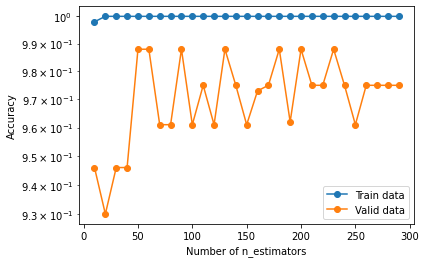

In [6]:
plt.semilogy(parameter_range,train_score, label = "Train data",marker = 'o')
plt.semilogy(parameter_range,test_score, label = "Valid data", marker = 'o')
plt.xlabel("Number of n_estimators")
plt.ylabel("Accuracy")
plt.legend()

 Is overfitting observed at any point in your plot? Explain!

 According to the plot, we can easily notice that the training accuracy and validation accuracy  of random forest parameter range.The result of accuracy on training data is very high, but the result of accuracy on validation data is very low, it is overfitting.

### Question 2

Compute the accuracy of a non-linear SVM with Gaussian kernel on the Leukemia dataset using ten-fold cross-validation with optimal hyperparameters chosen using nested cross-validation.
In your analysis perform model selection over the value of the soft-margin constant and the width parameter of the Gaussian kernel.  For each hyperparameter choose a wide enough range of values that makes sense.  
Compare the performance of the non-linear SVM to that of a linear SVM where you select an optimal value of the soft-margin constant, again using nested cross-validation..  Hint:  It is possible to get similar performance using the non-linear SVM.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#classifier = svm.SVC(kernel="rbf")

cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

param_grid = [
  {'C': [1, 10, 100, 500, 1000, 1500], 
   'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 
   'kernel': ['rbf']},
 ]

# instantiate a GridSearchCV object with SVM as the underlying classifier
# with the grid defined above
classifier = GridSearchCV(svm.SVC(), param_grid)

classifier.fit(X, y)

SVC(C=10, gamma=0.0001)

In [9]:
### optimal hyperparameters
classifier.best_estimator_

SVC(C=10, gamma=0.0001)

In [10]:
### cross-validation for non-linear SVM
accuracy = cross_val_score(classifier, X, y, cv=cv, 
                           scoring='accuracy')
print('Average accuracy of cross validation on non-linear SVM: ', round(np.mean(accuracy),3))

Average accuracy of cross validation on non-linear SVM:  0.973


In [11]:
### Linear SVM Part
linear_classifier = svm.SVC(kernel="linear", C=10, gamma=0.0001)
linear_accuracy = cross_val_score(linear_classifier, X, y, cv=cv, 
                           scoring='accuracy')
print('Average accuracy of cross validation on linear SVM: ', round(np.mean(linear_accuracy),3))

Average accuracy of cross validation on linear SVM:  0.973


In non-linear SVM with Gaussian kernel, I did Grid search by setting C in range of 1, 10, 100, 500, 1000, 1500, and gamma in range of 0.0001, 0.001, 0.01, 0.1, 1. As the result shows that the optimal hyperparameters for C and gamma are 10 and 0.0001 respectively. by using selectd C and gamma, I trained linear and non-liner SVM, as result shows above which same result accuracy 0.973. 

### Part 3:  NumPy:  sparsity

In machine learning we often encounter sparse data:  data that is mostly zeros.  Your task is to identify features that exhibit this behavior.

Write a function that receives a 2-d array as input and returns an array of Boolean values that indicates which columns have a fraction of zeros exceeding a user-provided threshold.
For example, given the input matrix

```Python
2 0 3 0
0 0 1 5
0 0 0 6
```

and a threshold of 0.5 the output should be 

```Python
array([ True,  True, False, False])
```

Do not use any loop construct in your implementation.

In [7]:
def sparse_features(X, sparsity = 0.5):
    initial_bool = np.array(X) == 0
    return np.round(np.sum(initial_bool, axis= 0)/len(initial_bool),3) > sparsity

sparse_features([[2,0,3,0],[0,0,1,5],[0,0,0,6]])

array([ True,  True, False, False])